             avg_watch_time  avg_rating  total_views
genre                                               
Documentary       66.463019    2.957935         1046
Drama             61.067686    2.905992          968
Action            59.235967    3.048241          995
Comedy            58.605888    2.992134         1017
Horror            58.037755    2.971030          932
Romance           57.403165    3.042945          978


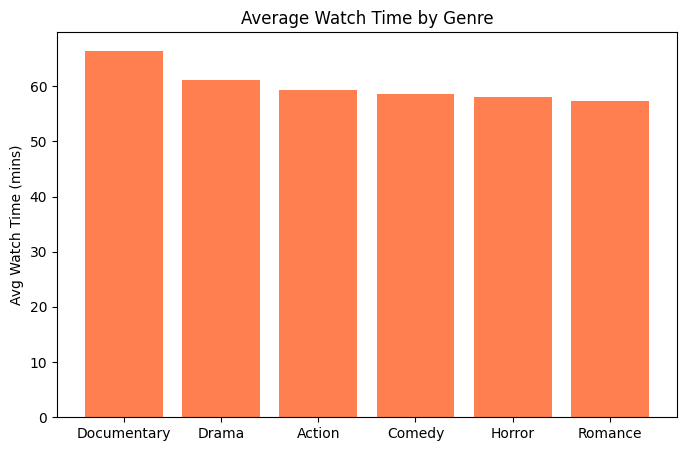

In [1]:
# --- Content Engagement Analysis (Netflix-style) ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

genres = ["Action", "Comedy", "Drama", "Horror", "Documentary", "Romance"]
users = [f"user_{i}" for i in range(1, 1001)]

data = []
for user in users:
    for _ in range(np.random.randint(3, 10)):  # each user watches 3–10 shows
        genre = np.random.choice(genres)
        watch_time = np.random.exponential(scale=60)  # minutes watched
        rating = np.random.randint(1, 6)
        data.append([user, genre, watch_time, rating])

df = pd.DataFrame(data, columns=["user_id", "genre", "watch_time", "rating"])

# Aggregate
genre_stats = df.groupby("genre").agg(
    avg_watch_time=("watch_time", "mean"),
    avg_rating=("rating", "mean"),
    total_views=("user_id", "count")
).sort_values("avg_watch_time", ascending=False)

print(genre_stats)

# Visualization
plt.figure(figsize=(8,5))
plt.bar(genre_stats.index, genre_stats["avg_watch_time"], color="coral")
plt.title("Average Watch Time by Genre")
plt.ylabel("Avg Watch Time (mins)")
plt.show()
